In [102]:
# import libraries needed
import IPython
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt

In [103]:
# loading original dataframe then checking its shape
df_original = pd.read_csv("C:/Users/JVW/Desktop/R_Stuff/diabetic_data.csv")
df_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [104]:
# making a copy of the data for cleaning
df = df_original.copy()
df.head

<bound method NDFrame.head of         encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discha

# Data Cleaning and Creation of New Variables

While reading more about the dataset I saw three columns with over 50% missing data

In [105]:
df = df.drop(['diag_2','diag_3','weight','payer_code','medical_specialty'], axis = 1)
#Dropping these two columns because in all 100000 obs they were all 0
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [106]:
df = df[df.gender != 'Unknown/Invalid']
df = df[df.discharge_disposition_id != 11]
df = df[df.diag_1 != '?']
df.shape

(100100, 43)

In [107]:
#changing everything to numeric values
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -1)

df['readmitted'] = df['readmitted'].replace('>30', 1)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [108]:
#Now im creating a new variable that keeps track of total number of visits to the hospital 
df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
df = df.drop(['number_outpatient','number_emergency','number_inpatient'], axis = 1)

In [120]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for column in drugs:
    colname = str(column) + 'temp'
    df[colname] = df[column].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
    
df['numchange'] = 0

for column in drugs:
    colname = str(column) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

In [110]:
df['index1_diag1'] = df['diag_1']
# disease codes starting with V or E are uninterprediable thus I recode them to 0
df.loc[df['diag_1'].str.contains('V'), ['index1_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['index1_diag1']] = 0
df['index1_diag1'] = df['index1_diag1'].replace('?', -1)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100100 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100100 non-null  int64 
 1   patient_nbr               100100 non-null  int64 
 2   race                      100100 non-null  object
 3   gender                    100100 non-null  int64 
 4   age                       100100 non-null  object
 5   admission_type_id         100100 non-null  int64 
 6   discharge_disposition_id  100100 non-null  int64 
 7   admission_source_id       100100 non-null  int64 
 8   time_in_hospital          100100 non-null  int64 
 9   num_lab_procedures        100100 non-null  int64 
 10  num_procedures            100100 non-null  int64 
 11  num_medications           100100 non-null  int64 
 12  diag_1                    100100 non-null  object
 13  number_diagnoses          100100 non-null  int64 
 14  max_

In [112]:
#Takes a coupls of minutes to run the code
df['index1_diag1'] = df['index1_diag1'].astype(float).astype(int)
for index, row in df.iterrows():
    if (row['index1_diag1'] >= 390 and row['index1_diag1'] < 460) or (np.floor(row['index1_diag1']) == 785):
        df.loc[index, 'index1_diag1'] = 1
    elif (row['index1_diag1'] >= 460 and row['index1_diag1'] < 520) or (np.floor(row['index1_diag1']) == 786):
        df.loc[index, 'index1_diag1'] = 2
    elif (row['index1_diag1'] >= 520 and row['index1_diag1'] < 580) or (np.floor(row['index1_diag1']) == 787):
        df.loc[index, 'index1_diag1'] = 3
    elif (np.floor(row['index1_diag1']) == 250):
        df.loc[index, 'index1_diag1'] = 4
    elif (row['index1_diag1'] >= 800 and row['index1_diag1'] < 1000):
        df.loc[index, 'index1_diag1'] = 5
    elif (row['index1_diag1'] >= 710 and row['index1_diag1'] < 740):
        df.loc[index, 'index1_diag1'] = 6
    elif (row['index1_diag1'] >= 580 and row['index1_diag1'] < 630) or (np.floor(row['index1_diag1']) == 788):
        df.loc[index, 'index1_diag1'] = 7
    elif (row['index1_diag1'] >= 140 and row['index1_diag1'] < 240):
        df.loc[index, 'index1_diag1'] = 8
    else:
        df.loc[index, 'index1_diag1'] = 0

In [113]:
#Recategorizing some of the admission types to have fewer categories in the adissiontypeid column
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

In [114]:
for column in drugs:
    df[column] = df[column].replace('No', 0)
    df[column] = df[column].replace('Steady', 1)
    df[column] = df[column].replace('Up', 1)
    df[column] = df[column].replace('Down', 1)

In [115]:
age_dict = {"[0-10)":5, "[10-20)":15, "[20-30)":25, "[30-40)":35, "[40-50)":45, "[50-60)":55, "[60-70)":65, "[70-80)":75, "[80-90)":85, "[90-100)":95}
df['age'] = df.age.map(age_dict)
df['age'] = df['age'].astype('int64')

In [116]:
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [118]:
#getting my dummy variables ready
df = pd.get_dummies(df, columns=['index1_diag1','change','A1Cresult','max_glu_serum','admission_source_id','discharge_disposition_id','race','age','admission_type_id','diag_1'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70434 entries, 0 to 101765
Columns: 797 entries, encounter_id to diag_1_V71
dtypes: int64(33), uint8(764)
memory usage: 69.6 MB


In [101]:
#Creating my training and testing data sets
train_output = df["readmitted"]
train_input = df.drop(['readmitted'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70434 entries, 0 to 101765
Columns: 796 entries, encounter_id to diag_1_V71
dtypes: int64(32), uint8(764)
memory usage: 69.1 MB


In [91]:
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split 

# Bagging Classification

In [96]:
#Fair warning it took me over an hour for the next two sections of code to finish running
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators= 500, random_state=0).fit(X_train, Y_train)

In [98]:
#Cross validation 5 folds
from sklearn.model_selection import cross_val_score
print("Cross Validation score: {}".format(np.mean(cross_val_score(clf, X_train, Y_train, cv=5))))

Cross Validation score: 0.6562195949768518


In [99]:
Y_test_predict = clf.predict(X_test)  
print("Accuracy is {}".format(accuracy_score(Y_test, Y_test_predict))) 

print("Precision is {}".format(precision_score(Y_test, Y_test_predict))) 

print("AUC is {}".format(roc_auc_score(Y_test, Y_test_predict)))

Accuracy is 0.6678497905870661
Precision is 0.6060200668896321
AUC is 0.6369157650729602


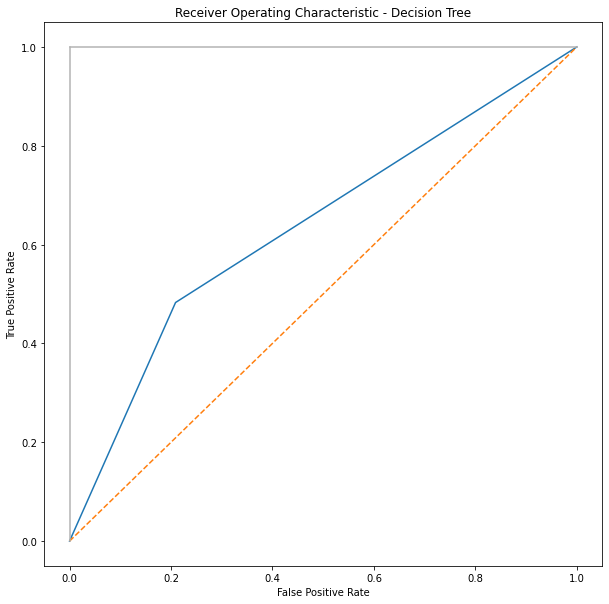

In [100]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_test_predict)
plt.subplots(1, figsize=(10,10)) 
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate, true_positive_rate) 
plt.plot([0, 1], ls="--") 
plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7") 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score,roc_curve
dte = DecisionTreeClassifier(max_depth=25, min_samples_split=100) 
dte.fit(X_train, Y_train) 

DecisionTreeClassifier(max_depth=25, min_samples_split=100)

In [76]:
from sklearn.model_selection import cross_val_score
print("Cross Validation score: {}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=5))))

Cross Validation score: 0.621169027318294


In [77]:
Y_test_predict = dte.predict(X_test) 
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(Y_test_predict, name = 'Predict'), margins = True) 
print("Accuracy is {}".format(accuracy_score(Y_test, Y_test_predict))) 

print("Precision is {}".format(precision_score(Y_test, Y_test_predict))) 

print("AUC is {}".format(roc_auc_score(Y_test, Y_test_predict)))


Accuracy is 0.6252573294526869
Precision is 0.5356779833299451
AUC is 0.5989781447930824


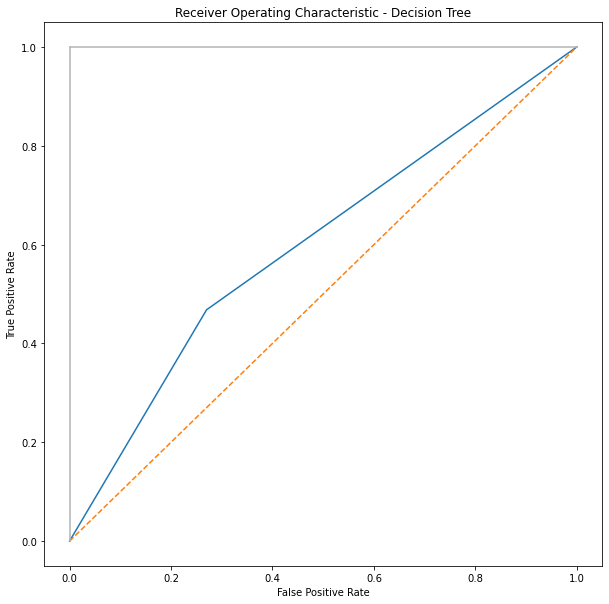

In [78]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_test_predict)
plt.subplots(1, figsize=(10,10)) 
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate, true_positive_rate) 
plt.plot([0, 1], ls="--") 
plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7") 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()


# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
clf = RandomForestClassifier(n_estimators=500, max_depth=25, min_samples_leaf=1, random_state=0)
clf = clf.fit(X_train, Y_train)

In [87]:
print("Cross Validation score: {}".format(np.mean(cross_val_score(clf, X_train, Y_train, cv=5))))

Cross Validation score: 0.6482155229031312


In [88]:
Y_test_predict = clf.predict(X_test) 
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(Y_test_predict, name = 'Predict'), margins = True) 
print("Accuracy is {}".format(accuracy_score(Y_test, Y_test_predict))) 

print("Precision is {}".format(precision_score(Y_test, Y_test_predict))) 

print("AUC is {}".format(roc_auc_score(Y_test, Y_test_predict)))

Accuracy is 0.6559948889046638
Precision is 0.6551860649247823
AUC is 0.5954846595177653


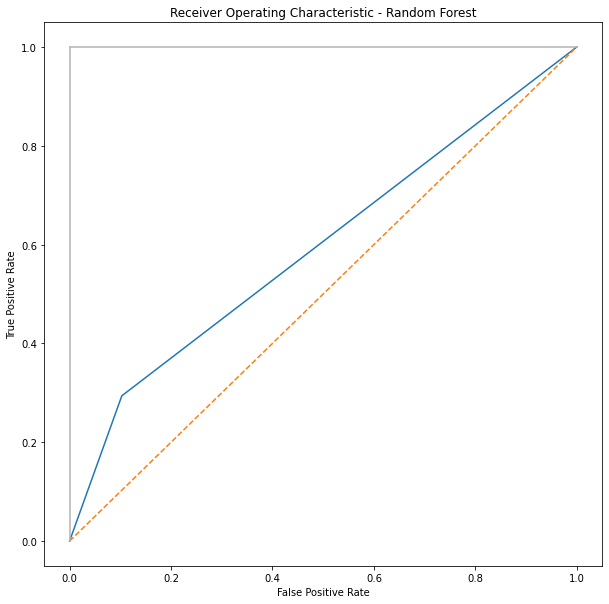

In [89]:
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_test_predict)
plt.subplots(1, figsize=(10,10)) 
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate, true_positive_rate) 
plt.plot([0, 1], ls="--") 
plt.plot([0, 0], [1, 0] , c=".7"), 
plt.plot([1, 1] , c=".7") 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

In [119]:
df.to_csv(r'C:/Users/JVW/Desktop/R_Stuff/diabetic_data_improved.csv', index = False)

# GBM

h2o.init(nthreads = -1)

path = "C:/Users/JVW/Desktop/R_Stuff/diabetic_data_improved.csv" 
diabetesdf = h2o.importFile(path)

myY = "readmitted"

myX = setdiff(names(diabetesdf), myY)

diabetesdf[,myY] = as.factor(diabetesdf[,myY])

gbm_m = h2o.gbm(x = myX, y = myY, training_frame = diabetesdf,distribution = 'multinomial', nfolds = 5)